In [44]:
import config
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [12]:
rc = pd.read_csv('data/RC.csv')

In [41]:
rc.describe()

,Date,Cost Index,Year Composite
count,129.000000,129.000000,129.000000
mean,1954.000000,65.515839,308.655323
std,37.383151,19.288464,568.733520
min,1890.000000,32.805185,4.233333
25%,1922.000000,49.420634,9.235000
50%,1954.000000,64.044606,29.689167
75%,1986.000000,82.794848,236.358333
max,2018.000000,100.568840,2744.680000


In [45]:
scaler=MinMaxScaler()
#fit scaler
scaler.fit(rc[['Cost Index', 'Year Composite']])
#transformed scaled data
rc_scaled=scaler.transform(rc[['Cost Index', 'Year Composite']])

#rever to dataframe
rc_scaled = pd.DataFrame(rc_scaled, columns=['Cost Index', 'Year Composite'])
rc_scaled['Date']=rc.Date
rc_scaled.head()

,Cost Index,Year Composite,Date
0,0.861429,1.000000,2018
1,0.846391,0.891820,2017
2,0.836152,0.761778,2016
3,0.824170,0.750595,2015
4,0.791969,0.702964,2014


## TLAC

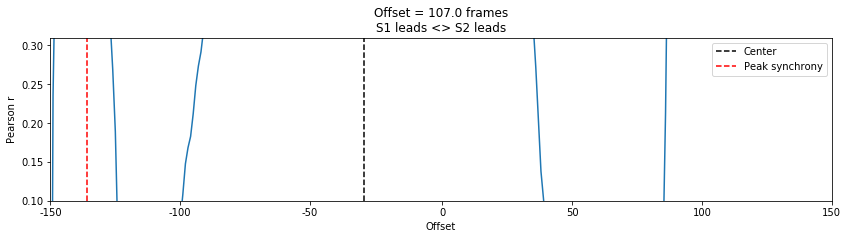

In [81]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = df['Cost Index']
d2 = df['Year Composite']
seconds = 4
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.ceil(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.1,.31],xlim=[0,301], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

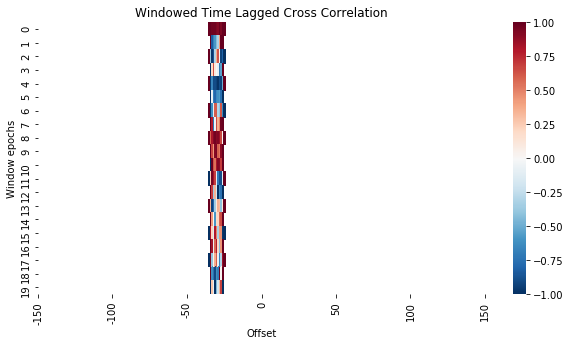

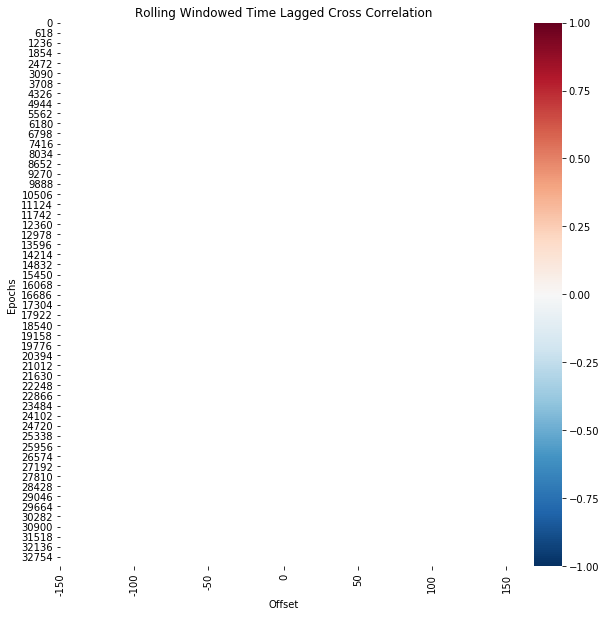

In [84]:
# Windowed time lagged cross correlation
seconds = 4
fps = 30
no_splits = 20
samples_per_split = df.shape[0]/no_splits
rss=[]
for t in range(0, no_splits):
    d1 = df['Cost Index'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    d2 = df['Year Composite'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
    rss.append(rs)
rss = pd.DataFrame(rss)
f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Window epochs')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

# Rolling window time lagged cross correlation
seconds = 4
fps = 30
window_size = 15 #samples
t_start = 0
t_end = t_start + window_size
step_size = 30
rss=[]
while t_end < 999999:
    d1 = df['Cost Index'].iloc[t_start:t_end]
    d2 = df['Year Composite'].iloc[t_start:t_end]
    rs = [crosscorr(d1,d2, lag, wrap=False) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
    rss.append(rs)
    t_start = t_start + step_size
    t_end = t_end + step_size
rss = pd.DataFrame(rss)

f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Rolling Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Epochs')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);